In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt


df = pd.read_csv('../data/jan_data.csv')
df['time'] = pd.to_datetime(df['time'])

df.iloc[1800]['dollar_open_interest_close']

C:\Users\vosko\AppData\Local\Temp\ipykernel_23712\3452797966.py:6: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/jan_data.csv')


1875000776.354

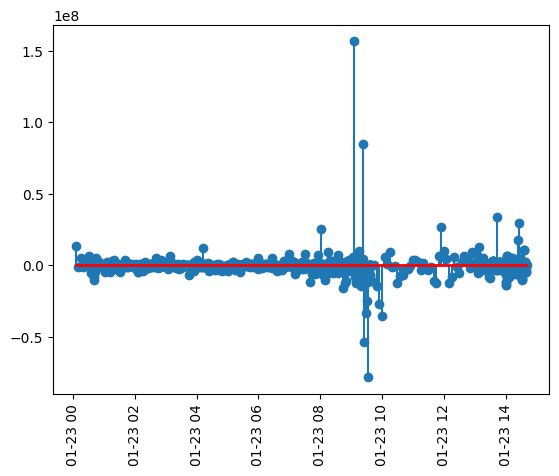

In [45]:

df['diff'] = df['dollar_open_interest_close'].diff()
df_jan2324 = df.loc[(df['time']>'2024-01-23') & (df['time']<'2024-01-24')]
x = df_jan2324['time']
y = df_jan2324['diff']
plt.xticks(rotation=90)
markerline, stemlines, baseline  = plt.stem(x,y)
plt.setp(baseline, color='r', linewidth=2)

plt.show()


In [98]:
from scipy import stats
import math

# applying kendall's tau on varying periods
df_slice = df_jan2324[df_jan2324['search_resolution']==1]
df_slice = df_slice.sort_values(by='time')
df_slice = df_slice.drop_duplicates(subset=['time'])
slice = 120
for i in range(0, math.floor(len(df_slice)/slice)):
    df_cut = df_slice.iloc[(i-1)*slice:(i*slice),:]
    print(f"Index between {(i-1)*slice} and {i*slice}: {stats.kendalltau(df_cut.index, df_cut['dollar_open_interest_close'])}")

df_slice.iloc[360:480,:]['dollar_open_interest_close']

Index between -120 and 0: SignificanceResult(statistic=nan, pvalue=nan)
Index between 0 and 120: SignificanceResult(statistic=-0.23557422969187675, pvalue=0.0001360833847519349)
Index between 120 and 240: SignificanceResult(statistic=-0.2840336134453781, pvalue=4.22507575961194e-06)
Index between 240 and 360: SignificanceResult(statistic=-0.003361344537815126, pvalue=0.9565863851499059)
Index between 360 and 480: SignificanceResult(statistic=-0.7893557422969187, pvalue=2.0194642762545405e-37)


14534    2.183279e+09
14535    2.184525e+09
14536    2.183904e+09
14537    2.183762e+09
14538    2.183564e+09
             ...     
14673    2.148813e+09
14674    2.151571e+09
14675    2.153537e+09
14676    2.156639e+09
14677    2.156798e+09
Name: dollar_open_interest_close, Length: 120, dtype: float64